# Exploratory Data Analysis


## Importing the data from home_sales.db

In [1]:
#import necessary libraries here
import sqlite3
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Creating connection to database
try:                     #relative path method (tested with Spyder)
    con = sqlite3.connect('data/home_sales.db')
except OperationError:   #for home because my pc's jupyter doesn't like relative path
    con = sqlite3.connect('C:/Users/DELL/Downloads/AIAP Submission/datadata/home_sales.db')

cursor = con.cursor()
#look for names of tables in database and assigned the name to table_name
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_name = str(cursor.fetchall()[0][0])
print('Name of table to read in: '+ table_name)

Name of table to read in: sales


# 1. Preliminary Overview:
Run a few generic printouts to get an overview of the dataset, to see the shape, data ypes, missing values, basic statistics range of each column etc.

In [3]:
#writing database into raw_data with parsing of date column, then display shape and head()
raw_data = pd.read_sql_query("SELECT * FROM " + table_name, con, parse_dates=['date'])
display(raw_data.shape, raw_data.head())

(23154, 18)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,2014-10-13,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,2014-12-09,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,2015-02-25,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,2014-12-09,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,2015-02-18,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [4]:
display(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21871 non-null  float64       
 1   date              21682 non-null  datetime64[ns]
 2   price             21896 non-null  float64       
 3   bedrooms          21905 non-null  float64       
 4   bathrooms         21938 non-null  float64       
 5   floors            21862 non-null  float64       
 6   waterfront        21871 non-null  float64       
 7   view              21908 non-null  float64       
 8   condition         21890 non-null  object        
 9   review_score      21851 non-null  float64       
 10  basement_size     21929 non-null  float64       
 11  built             21853 non-null  float64       
 12  renovation        21897 non-null  float64       
 13  zipcode           21884 non-null  float64       
 14  latitude          2190

None

In [5]:
display(raw_data.describe())

,id,price,bedrooms,bathrooms,floors,waterfront,view,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
count,2.187100e+04,2.189600e+04,21905.000000,21938.000000,21862.000000,21871.000000,21908.000000,21851.000000,21929.000000,21853.000000,21897.000000,21884.000000,21903.000000,21883.000000,21912.000000,21932.000000
mean,7.393268e+06,5.406538e+05,3.368820,2.112339,1.494397,0.007910,0.231833,7.655439,291.298053,1970.976571,85.129287,98077.871093,47.560590,-122.214179,1986.661464,12778.076737
std,3.897312e+05,3.694047e+05,0.908358,0.769817,0.540461,0.088588,0.763716,1.175198,442.204370,29.351063,403.325712,53.462253,0.138453,0.140673,686.948071,27236.176495
min,6.721618e+06,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,7.055892e+06,3.210000e+05,3.000000,1.500000,1.000000,0.000000,0.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471900,-122.328000,1490.000000,5100.000000
50%,7.389071e+06,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.572600,-122.231000,1840.000000,7620.000000
75%,7.728466e+06,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678400,-122.125000,2360.000000,10087.250000
max,8.071385e+06,7.700000e+06,11.000000,8.000000,3.500000,1.000000,4.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#printing out 
for column in raw_data.columns:
     print("\n" + column)
     print(raw_data[column].value_counts(dropna=False))


id
NaN          1283
7417357.0       3
7901811.0       3
7771151.0       3
7158318.0       3
             ... 
6988925.0       1
7775383.0       1
8037532.0       1
7251110.0       1
7472531.0       1
Name: id, Length: 20344, dtype: int64

date
NaT           1472
2014-06-23     143
2015-03-25     132
2014-07-08     131
2015-04-27     129
              ... 
2014-08-30       1
2015-03-08       1
2015-01-31       1
2014-11-30       1
2015-05-24       1
Name: date, Length: 372, dtype: int64

price
NaN          1258
450000.0      170
350000.0      169
425000.0      156
550000.0      155
             ... 
969000.0        1
386180.0        1
1034500.0       1
608500.0        1
606150.0        1
Name: price, Length: 3913, dtype: int64

bedrooms
3.0     9965
4.0     6969
2.0     2800
5.0     1620
NaN     1249
6.0      272
1.0      203
7.0       41
8.0       13
0.0       12
9.0        5
10.0       3
11.0       2
Name: bedrooms, dtype: int64

bathrooms
2.50    5427
1.00    3930
1.75    3086
2.25

In [7]:
# assigning the raw_data to df so as to preserve the untouched data.
df = raw_data.copy()

# 2.   Relevance of Attributes

I will next assess the relevance of some of the attributes. 

## 2.1   ID Column

First is to check whether we can make use of transaction ID as row indexing purpose. With reference to value_count() output of id column (see above), it is apparent some id appears multiple times. Using Counter function (see below), we see that a total of 1468 id values appear in more than one row, i.e. some id can represent more than 1 property transaction. As such we cannot use id column as index.

In [8]:
#checking if id column can be used as index
print(Counter(df.id.value_counts()))

Counter({1: 18875, 2: 1408, 3: 60})


## 2.2   Longitude, Latitude and Zipcode
A scatter plot of longitude vs latitude is shown below, which is in essence an 'aerial view' of the locations of the properties. In this form these 2 fields are not very useful as property value can be very non-linear over a county. Furthermore the zipcode already duplicate the longitude-latitude pair, albeit with lower precision. Hence both longitude and latitude columns need not be fed to machine learning algorithm.

A check on the zipcodes unique count shows that there are 70 codes, which should provide sufficient granularity. The zipcodes will be converted to category in feature engineering.

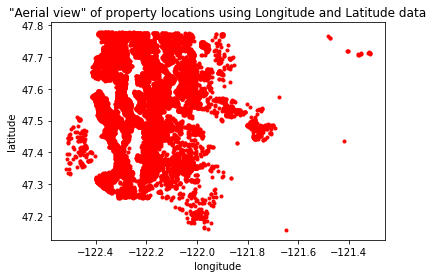

In [9]:
plt.scatter(df.longitude,df.latitude, marker='.', c='red')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('"Aerial view" of property locations using Longitude and Latitude data')
plt.show()

In [10]:
#checking the number of unique zipcodes in dataset
print("Total number of unqiue zipcodes in dataset: {}".format(df.zipcode.nunique()))

Total number of unqiue zipcodes in dataset: 70


## 2.3  Date Attribute

Machine learning is usually not suitable for extrapolations, so we cannot expect the ML models to perform price predictions outside of the date range provided in the raw data. However, we may still be able to make some use of the date feature by capturing the seasonality effect on prices, if it exist. 

To verify, first we check range of months in the data, which ranges from May 2014 to May 2015. Then plot the number of transactions for each month, which clearly show a trend of higher number of transactions in the 'warmer' months from spring to autumn. So the machine learning models may be able to extract something useful if we feed in the month of the transaction as a category to account for seasonality effect on prices. I will do the transformation latter in feature engineering.

yr      mth 
2014.0  5.0     1769
        6.0     2196
        7.0     2252
        8.0     1951
        9.0     1777
        10.0    1921
        11.0    1428
        12.0    1466
2015.0  1.0      990
        2.0     1107
        3.0     1897
        4.0     2251
        5.0      677
Name: mth, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


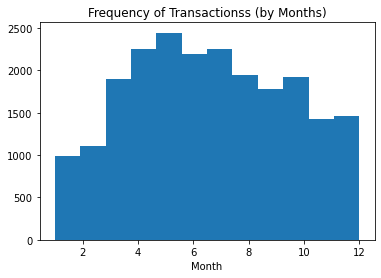

In [11]:
#checking the range of months in data as well as number of monthly transactions
df['mth'] = pd.DatetimeIndex(df['date']).month
df['yr'] = pd.DatetimeIndex(df['date']).year
display(df.groupby(['yr','mth'])['mth'].count())

#plotting the monthly number of transactions
_ = plt.hist(pd.DatetimeIndex(df.date).month, bins=12)
_ = plt.xlabel('Month')
_ = plt.title('Frequency of Transactionss (by Months)')
plt.show()

# 4.  Missing Data Clean Up:
Next is to handle the missing data, moving from columns to columns.

## 4.1  Missing Prices and Lot_size
There seems to be around 1200 to 1400+ NaN (or NaT) values in many of the columns. This may be common in certain rows of data. Since price is a crucial field (being the target), and there is no meaningful way to fill in the missing price data, we should remove the rows with missing price data first.

I will also remove rows with null value in lot_size column because for property value, land size is also very important, without which the data is almost useless for price prediction. Furthermore there is no practical way to infer lot size from other data in this database.

In [14]:
df=df.dropna(subset=['date','bedrooms','bathrooms','living_room_size','zipcode','waterfront','lot_size','condition'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20630 entries, 0 to 23152
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                20630 non-null  float64       
 1   date              20630 non-null  datetime64[ns]
 2   price             20630 non-null  float64       
 3   bedrooms          20630 non-null  float64       
 4   bathrooms         20630 non-null  float64       
 5   floors            20630 non-null  float64       
 6   waterfront        20630 non-null  float64       
 7   view              20630 non-null  float64       
 8   condition         20630 non-null  object        
 9   review_score      19474 non-null  float64       
 10  basement_size     20630 non-null  float64       
 11  built             20630 non-null  float64       
 12  renovation        20630 non-null  float64       
 13  zipcode           20630 non-null  float64       
 14  latitude          2063

None

In [15]:
#dropping rows with missing price data, or rather picking up rows with valid price data
df = df[df.price.notnull()]

#picking up rows with not null lot_size data
df = df[df.lot_size.notnull()]

#checking for null
for col in df.columns:
    if df[col].isna().sum() > 0:
        print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum())))

# [print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum()))) for col in df.columns if df[col].isna().sum() > 0];

              id   264  null entries
            date   495  null entries
        bedrooms   268  null entries
       bathrooms   260  null entries
          floors   287  null entries
      waterfront   283  null entries
            view   263  null entries
       condition   264  null entries
    review_score  1196  null entries
   basement_size   261  null entries
           built   269  null entries
      renovation   265  null entries
         zipcode   282  null entries
        latitude   266  null entries
       longitude   255  null entries
living_room_size   276  null entries
             mth   495  null entries
              yr   495  null entries


## 4.2  Missing Review_Score
Review_score column has the highest number of null values. I will try to retain as much data as possible by filling in the null values with reasonable estimates, if it is sensible to do so.

Since review score ranges from 1 to 13, with 50% of reviews between 7.0 to 8.0 and mean of 7.66 (reading from .describe() output above), I can fill up the null reviews with 8.0 (round up to whole number because review scores are all in whole numbers). A plot of the histogram of review_score adds to this confidence.

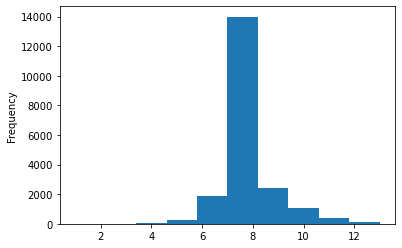

In [13]:
#plotting the review_score column histogram
df.review_score.plot(kind='hist')

#fill up missing review_score with 8.0
df.review_score = df.review_score.fillna(8.0)

## 4.3  Missing Zipcode
Rows without zip code should be remove because property is about location, and some times, even though 2 properties are physically not far apart, the zipcode difference has a great influence on property prices. Although we can use the longitude and latitude data to approximate the zipcode, this method will require detailed cross-referencing to actual zipcode map, as otherwise we can quite easily misallocate the zipcode. Anyway we are removing 120 datapoints, which is around 0.58% of remaining data, so the impact should be small to insignificant.

In [14]:
#remove rows with null in zipcode column
df = df[df.zipcode.notnull()]

#checking for null
for col in df.columns:
    if df[col].isna().sum() > 0:
        print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum())))

              id    99  null entries
            date   333  null entries
        bedrooms    95  null entries
       bathrooms   112  null entries
          floors   123  null entries
      waterfront   101  null entries
            view   106  null entries
       condition   106  null entries
   basement_size   103  null entries
           built    98  null entries
      renovation   111  null entries
        latitude   114  null entries
       longitude   106  null entries
living_room_size    96  null entries
             mth   333  null entries
              yr   333  null entries


## 4.4  Missing Bedrooms
Since this is housing data, the number of bedrooms can be an important factor on prices, hence I will remove rows with null in bedrooms since there are only 95 rows (0.45%) to be remove at this point.

In [15]:
#remove rows with null in bedrooms column
df = df[df.bedrooms.notnull()]

#checking for null
for col in df.columns:
    if df[col].isna().sum() > 0:
        print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum())))

              id    49  null entries
            date   275  null entries
       bathrooms    50  null entries
          floors    61  null entries
      waterfront    45  null entries
            view    44  null entries
       condition    46  null entries
   basement_size    46  null entries
           built    45  null entries
      renovation    54  null entries
        latitude    50  null entries
       longitude    49  null entries
living_room_size    44  null entries
             mth   275  null entries
              yr   275  null entries


## 4.5  Missing Bathrooms
After bedrooms, the number of bedrooms is also an important factor on prices, hence I will remove rows with null in bathrooms since there are only 50 rows (0.24% of remaining data) to be remove at this point.

In [16]:
#remove rows with null in bathrooms column
df = df[df.bathrooms.notnull()]

#checking for null
for col in df.columns:
    if df[col].isna().sum() > 0:
        print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum())))

              id    18  null entries
            date   246  null entries
          floors    18  null entries
      waterfront    17  null entries
            view    15  null entries
       condition    16  null entries
   basement_size    15  null entries
           built    16  null entries
      renovation    18  null entries
        latitude    13  null entries
       longitude    18  null entries
living_room_size    17  null entries
             mth   246  null entries
              yr   246  null entries


## 4.6  Missing Dates
Next column to clean is date. Although all the dates are in 2014 to 2015, prices of property do fluctuate over months, so if I fill in an arbitrary mid-point date, I may mess up the seasonal effects on price. Anyway there are only 246 rows of data with missing date, which is around 1.2% of remaining data, weighing the pro and con, I will proceed to remove rows with missing dates.

In [17]:
#remove rows with null in date column
df = df[df.date.notnull()]

#checking for null
for col in df.columns:
    if df[col].isna().sum() > 0:
        print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum())))

              id     8  null entries
          floors     7  null entries
      waterfront     6  null entries
            view     7  null entries
       condition     6  null entries
   basement_size     8  null entries
           built     8  null entries
      renovation     7  null entries
        latitude     4  null entries
       longitude    10  null entries
living_room_size     9  null entries


## 4.7  The last bits of Missing Data
Seems like there are only less than 10 missing datapoints per column. I suspect that most of these missing data exist on the same rows. Bad data entries are usually the work of the same person. Let's see the rows with missing living_room_size data:

In [18]:
display(df[df.living_room_size.isnull()])

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size,mth,yr
5222,NaN,2015-04-28,350000.0,4.0,2.25,2.0,0.0,NaN,fair,7.0,NaN,1998.0,NaN,98031.0,NaN,NaN,NaN,7591.0,4.0,2015.0
5394,NaN,2015-05-05,411000.0,2.0,2.25,1.0,0.0,NaN,None,8.0,900.0,NaN,NaN,98038.0,NaN,NaN,NaN,108900.0,5.0,2015.0
11003,NaN,2014-05-20,300000.0,3.0,1.00,NaN,0.0,NaN,good,7.0,NaN,NaN,NaN,98059.0,NaN,NaN,NaN,8570.0,5.0,2014.0
11792,7576406.0,2014-07-02,256000.0,4.0,2.50,NaN,NaN,NaN,None,7.0,NaN,NaN,NaN,98198.0,47.3527,NaN,NaN,6615.0,7.0,2014.0
18528,NaN,2014-05-20,206000.0,4.0,2.00,NaN,NaN,0.0,fair,8.0,NaN,NaN,0.0,98002.0,47.3029,NaN,NaN,5956.0,5.0,2014.0
20563,NaN,2014-08-04,1240420.0,5.0,3.25,NaN,NaN,3.0,None,7.0,NaN,NaN,NaN,98006.0,47.5388,NaN,NaN,13726.0,8.0,2014.0
20834,7349022.0,2014-09-25,414000.0,3.0,2.50,NaN,0.0,0.0,None,8.0,NaN,NaN,NaN,98065.0,47.5340,NaN,NaN,3393.0,9.0,2014.0
21248,NaN,2015-03-03,1080000.0,3.0,2.50,NaN,NaN,NaN,None,11.0,NaN,1995.0,NaN,98006.0,47.5745,NaN,NaN,21569.0,3.0,2015.0
22088,NaN,2015-04-27,340000.0,3.0,2.00,2.0,NaN,NaN,fair,8.0,350.0,NaN,0.0,98136.0,NaN,NaN,NaN,1910.0,4.0,2015.0


Indeed there are quite a number of missing data on the same rows, hence I will remove these rows. 

In [19]:
#remove rows with null in living_room_size column
df = df[df.living_room_size.notnull()]

#checking for null
for col in df.columns:
    if df[col].isna().sum() > 0:
        print('{:>16} {:>5}  null entries'.format(col, str(df[col].isna().sum())))

              id     1  null entries
          floors     1  null entries
      waterfront     1  null entries
            view     1  null entries
       condition     1  null entries
   basement_size     1  null entries
           built     1  null entries
       longitude     1  null entries


Found the remaining "culprits" on the same row. Removing this row of data.

In [20]:
#again checking if the remaining null data are clustered on same row
display(df[df.waterfront.isnull()])

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size,mth,yr
4309,NaN,2015-04-08,535000.0,2.0,1.75,NaN,NaN,NaN,None,7.0,NaN,NaN,0.0,98188.0,47.4282,NaN,1830.0,12178.0,4.0,2015.0


In [21]:
#clearing away the final row of nulls
df = df[df.waterfront.notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20630 entries, 0 to 23152
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                20630 non-null  float64       
 1   date              20630 non-null  datetime64[ns]
 2   price             20630 non-null  float64       
 3   bedrooms          20630 non-null  float64       
 4   bathrooms         20630 non-null  float64       
 5   floors            20630 non-null  float64       
 6   waterfront        20630 non-null  float64       
 7   view              20630 non-null  float64       
 8   condition         20630 non-null  object        
 9   review_score      20630 non-null  float64       
 10  basement_size     20630 non-null  float64       
 11  built             20630 non-null  float64       
 12  renovation        20630 non-null  float64       
 13  zipcode           20630 non-null  float64       
 14  latitude          2063

# 5. Data Types Clean Up
With all missing data cleared up, next I will move on to data types. The following are my observations and proposed changes to data types that will not degrade the data whilst keeping things more efficient and easier to interpret:

## 5.1 Changing to integer type to save memory and speed up computation
- Price column: change to int type because decimal points is too insignificant for property valuation
<br>
- Bedrooms column: change to int type since all values are whole numbers
<br>
- Waterfront column: change to int type since all are either 0 or 1
<br>
- View column: change to int type because all for expressed in integers between 0 to 4
<br>
- Review_score column: change all to int type since raw data are whole numbers.
<br>
- Basement_size column: Change all to int type since given the scale, decimal points make no impact.
<br>
- Built column: Change to int type since year.
<br>
- Renovation column: Change to int type since year.
<br>
- Zipcode column: Change to int type.
<br>
- Living_room_size: Change to int type since given the scale, decimal points make no impact.
<br>
- Lot_size column: Change to int type since given the scale, decimal points make no impact.

## 5.2 Change to lower case: Condition column
- Condition column: unify all to lower case string and consolidate into 5 categories, i.e. 'excellent", "good", "fair", "poor", and "terrible".

## 5.3 Retain as float: Bathrooms and Floor columns
- Bathrooms column: retain in steps of 0.25 because in USA, the way bathrooms are counted is a sink, toilet, bathtub and shower are each counted as 0.25 unit.
<br>
- Floors column: retain in steps of 0.5 because 0.5 floor can mean an attic or mezzannine level.

In [22]:
#convert to int types
to_int_list = ['price','bedrooms','view','review_score','basement_size','waterfront',
               'built','renovation','zipcode','living_room_size','lot_size']
df[to_int_list] = df[to_int_list].astype(int)

#tidy up condition column to lower case and then to 5 categories
df.condition = df.condition.str.lower()#.map({'terrible':0,'poor':1,'fair':2,'good':3,'excellent':4})

display(df.head()) 

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size,mth,yr
0,7787980.0,2014-10-13,221900,3,1.00,1.0,0,0,fair,10,0,1955,0,98178,47.5112,-122.257,1340,5650,10.0,2014.0
1,6774848.0,2014-12-09,538000,3,2.25,2.0,0,0,fair,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,12.0,2014.0
2,6999329.0,2015-02-25,180000,2,1.00,1.0,0,0,fair,8,0,1933,0,98028,47.7379,-122.233,2720,8062,2.0,2015.0
3,7773052.0,2014-12-09,604000,4,3.00,1.0,0,0,excellent,6,910,1965,0,98136,47.5208,-122.393,1360,5000,12.0,2014.0
4,7760818.0,2015-02-18,510000,3,2.00,1.0,0,0,fair,6,0,1987,0,98074,47.6168,-122.045,1800,7503,2.0,2015.0


# 6.  Histograms

Below is a total of 14 histograms of the relevant attributes. We can see the following:

First, several of the numerical attributes are positively skewed, namely living room size, lotsize, basement size, and price. These will need to be "unskewed" or normalized, which will be done in feature engineering.

Second, there is a need to transform renovation and built columns. The age of house and age of renovation will make more sense. Again these will be done in feature engineering.

Third, there are a tiny silver of houses with zero bedrooms and/or bathrooms. Not sure why, though these could be legitimate data and not errors or omissions. As such I will leave them intact as the numbers are way too small anyway.

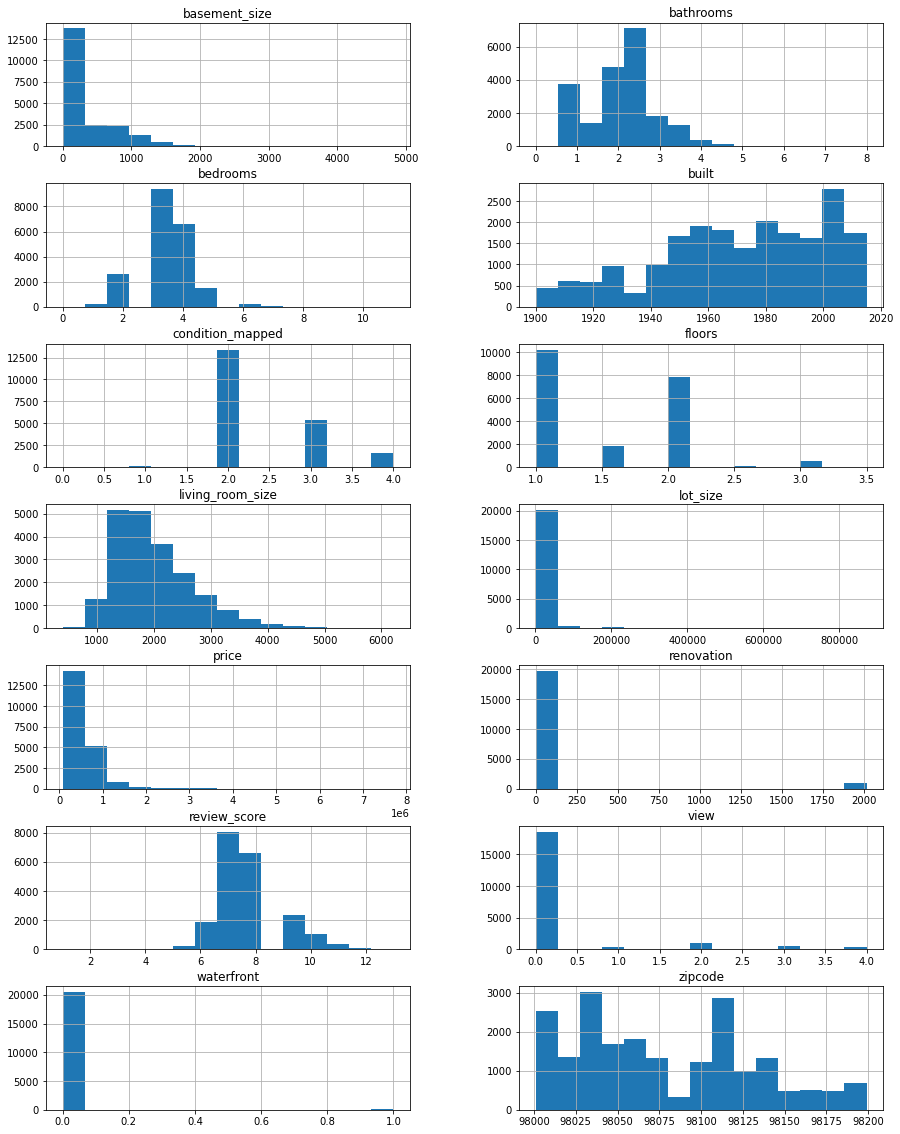

In [23]:
#for sake of seeing histogram of condition column, a new column is added to numerically map the condition grades 
df['condition_mapped'] = df.condition.map({'terrible':0,'poor':1,'fair':2,'good':3,'excellent':4})

figs, ax = plt.subplots(7, 2, figsize=(15,20))
col_to_plot = ['date','price','bedrooms','floors','bathrooms',
               'waterfront','view','condition_mapped','review_score','basement_size',
               'built','renovation','zipcode','living_room_size','lot_size']

_ = df.hist(col_to_plot, ax=ax, bins=15)

##  6.1  Skewness

Plotting the "unskewed" histograms of price, basement_size, living_room_size and lot_size to visually check the effect of applying log(x+1) functon. From the plots below, it appear that the normalization should work fine.

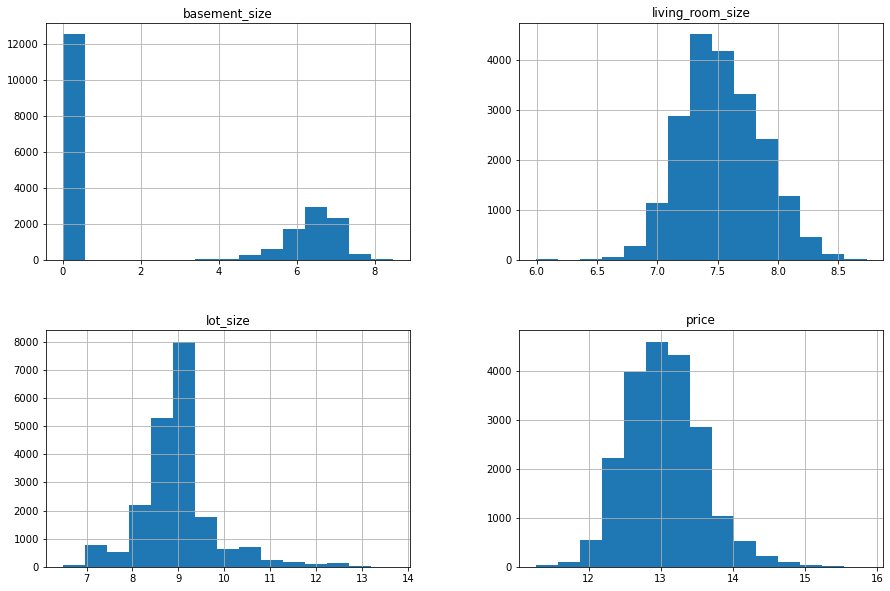

In [24]:
col_to_unskew = ['price','basement_size','living_room_size','lot_size']

#applying log function to df_temp
df_temp = df[col_to_unskew].copy().apply(np.log1p)

#plotting unskewed attributes
figs, ax = plt.subplots(2, 2, figsize=(15,10))
_ = df_temp.hist(df_temp.columns, ax=ax, bins=15)

# 7.  Checking Correlations

Correlations can help identify collinearity between predictor / independent variables), such that they express a linear relationship in a regression model. In other words, they explain some of the same variance in the dependent variable, which in turn reduces their statistical significance. (I added in the target variable, price, not to check for collinearity, but just out of curiousity and to KIV to see how this will compare with the models' outcome.)

There does not seem to be strong correlations amongst the predictor columns, with the highest being that between living_room_size and bathrooms (0.57), followed by bedrooms and bathrooms (0.53). This seems logical since more bedrooms usually mean more attached bathrooms.

,price,bedrooms,floors,bathrooms,waterfront,view,condition_mapped,review_score,basement_size,built,renovation,zipcode,living_room_size,lot_size
price,1.000000,0.314300,0.256700,0.527189,0.271660,0.400158,0.033479,-0.004913,0.330123,0.054440,0.129573,-0.054740,0.584773,0.087332
bedrooms,0.314300,1.000000,0.182060,0.526872,-0.005198,0.086838,0.025941,0.001350,0.308746,0.155061,0.022433,-0.159456,0.401911,0.033685
floors,0.256700,0.182060,1.000000,0.500678,0.024625,0.031613,-0.258299,-0.004968,-0.245490,0.485545,0.008556,-0.056041,0.277798,-0.014414
bathrooms,0.527189,0.526872,0.500678,1.000000,0.063047,0.193484,-0.127892,0.000248,0.286133,0.506092,0.052245,-0.205370,0.569782,0.093078
waterfront,0.271660,-0.005198,0.024625,0.063047,1.000000,0.414463,0.016360,-0.004857,0.077604,-0.024748,0.095301,0.030486,0.090412,0.035361
view,0.400158,0.086838,0.031613,0.193484,0.414463,1.000000,0.041368,-0.000785,0.273818,-0.046308,0.102798,0.081031,0.286405,0.074211
condition_mapped,0.033479,0.025941,-0.258299,-0.127892,0.016360,0.041368,1.000000,0.001708,0.171235,-0.360744,-0.060034,0.001915,-0.092234,-0.002677
review_score,-0.004913,0.001350,-0.004968,0.000248,-0.004857,-0.000785,0.001708,1.000000,0.002273,0.003264,0.003357,-0.008198,0.004492,0.007265
basement_size,0.330123,0.308746,-0.245490,0.286133,0.077604,0.273818,0.171235,0.002273,1.000000,-0.130553,0.069361,0.070785,0.202292,0.020970
built,0.054440,0.155061,0.485545,0.506092,-0.024748,-0.046308,-0.360744,0.003264,-0.130553,1.000000,-0.226480,-0.345387,0.324744,0.069154


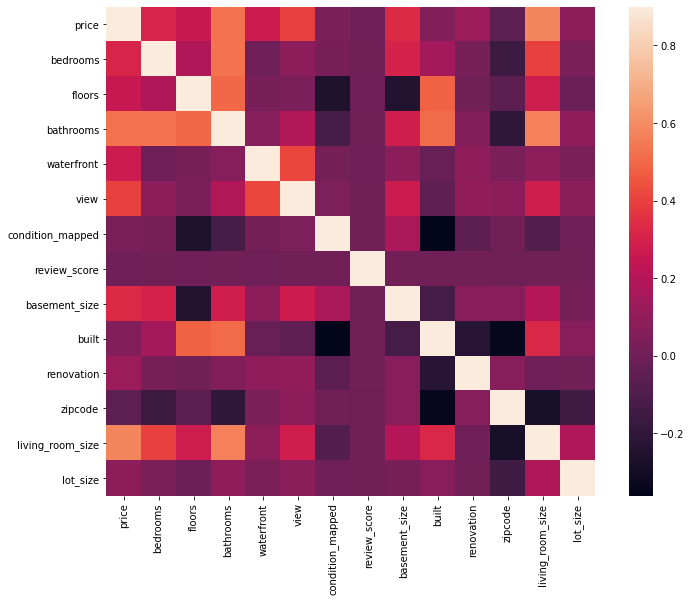

In [25]:
#Getting a list of columns to check for correlations
corr_col = ['price','bedrooms','floors','bathrooms',
               'waterfront','view','condition_mapped','review_score','basement_size',
               'built','renovation','zipcode','living_room_size','lot_size']

#Plotting correlation heat map
corr_heat_map = df[corr_col].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_heat_map, vmax=0.9, square=True)

display(df[corr_col].corr())

# 8.  Output of Filtered Data

Option to output a cleaned csv data file called "data_filtered.csv" and store it in data folder for the src python machine learning files to access and create models.

In [26]:
#removing temporary columns: condition_mapped, mth, yr
df = df.drop(['condition_mapped','mth','yr'], axis=1)

#df.to_csv("data/data_filtered.csv")

# 9.  How to classify prices into bins?

An important question for using classification on prices, namely how to define the price bins' boundaries? There are 2 key considerations. 

First, will the data be balanced? Given that the price histogram plot exhibits a high degree of positive skew, if we are to assign uniformly-spaced bins, we will run into problem of imblanced data, which brings serious doubts on the usefulness of the models.

Second, will users find the price bins useful and intuitive?

Let's put aside the second consideration and tackle the first issue, which is imbalanced data. To ensure that each bin has a balanced number of data points, we can use the percentile method, i.e. to rank the data by prices in ascending order, and then group them into price bins at, say, 5-percentile increments. So we can get a total of 20 price bins. This is implemented in the following codes, and we get around 1031 data point per bin.

Afterwhich I rounded the bins' edges to the nearest thousands for ease of use by lay-person, and the eventual bins' edges are as print below. From the chart below, the number of data points per bin fluctuate from around 908 to 1142, which is still fairly well-balanced.


In [27]:
#oopy out the price data into an array for sorting into ascending order
prices = np.array(df['price'].copy())
prices.sort()

#calculating the number of price data per bin
num_per_bin = int(len(prices)/20)

#Getting the desired price bin edges
bins_edges = [prices[i*num_per_bin] for i in range(21)]
bins_edges[-1] = max(prices) #to capture the last data points

#round to the thousands, for ease of use by lay-person
bins_edges_rounded = [round(edge,-3) for edge in bins_edges]

#reversing order to start from the largest bin
bins_edges_rounded.reverse()
print("Price Bin Edges: ", bins_edges_rounded)

Price Bin Edges:  [7700000, 1150000, 885000, 780000, 705000, 646000, 595000, 551000, 520000, 483000, 450000, 425000, 400000, 371000, 345000, 321000, 297000, 270000, 245000, 210000, 78000]


## 9.1 Adjusting the bin edges

It appears that the price bin edges are not very intuitive, and can cause some confusion to users. So I will try to adjust it so that the bins less balanced than ideal case but still acceptable. The proposed bin edges will be as follow:

8000000, 2000000, 1500000, 1000000, 900000, 800000, 700000, 650000, 600000, 550000, 525000, 500000, 475000, 450000, 425000, 400000, 375000, 350000, 325000, 300000, 275000, 250000, 225000, 200000, 50000

As shown in the chart below, the distribution of the data points across the bins are less than ideal but still acceptable, except for the first 2 bins which contains prices from 1.5 mil to 2 mil, and 2 mil to 8 mil. Given that these 2 high value price bins are already quite wide, we will use this set.


Min count: 196	Max count: 1356	Total number of bins: 24


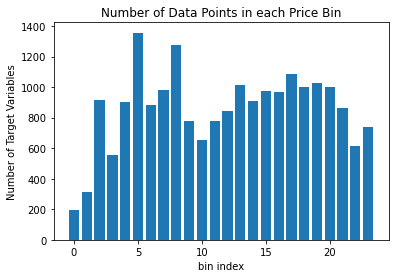

In [28]:
prices = np.array(df['price'].copy())

bins_edges_adjusted = [8000000, 2000000, 1500000, 1000000, 900000, 800000, 700000, 
                       650000, 600000, 550000, 525000, 500000, 475000, 450000, 425000, 
                       400000, 375000, 350000, 325000, 300000, 275000, 250000, 225000, 200000, 50000]

price_bin_index = [] #initialize the bin index
for price in prices:
    for i, bin_edge in enumerate(bins_edges_adjusted[1:]):
        if (price >= bin_edge):
            price_bin_index.append(i)  #found the bin, and then break loop
            break

#checking if data is balanced across the bins.
counter = Counter(price_bin_index)
print('\nMin count: {}\tMax count: {}\tTotal number of bins: {}'
      .format(min(counter.values()), max(counter.values()), len(counter.values())))

_ = plt.bar(counter.keys(),counter.values())
_ = plt.xlabel('bin index')
_ = plt.ylabel('Number of Target Variables')
_ = plt.title('Number of Data Points in each Price Bin')
_ = plt.show

## 9.2  Further Adjustments to Bins

After running the various classifiers, the models' accuracy and precision scores are below average, to put it politely. I think the main problem has to be the bin edges, which are too tight. If the best Regression model only produces an RMSE of around 168,000, then it may be quite unfair to require the classifier to perform well with bins of price range as small as 25,000.

I tested out this theory by enlarging each bins, i.e. widen the price range of each bin. Two configurations are test, the bin edges are as below:

#### bins_edges_medium - 8000000, 1500000, 1000000, 900000, 800000, 700000, 600000, 500000, 400000, 300000, 200000, 0

#### bins_edges_large - 8000000, 1500000, 1100000, 900000, 700000, 550000, 450000, 350000, 250000, 0


Min count: 508	Max count: 2083	Total number of bins: 15


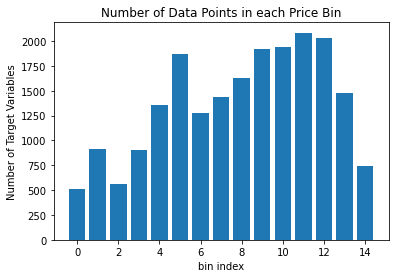

In [29]:
prices = np.array(df['price'].copy())

bins_edges_medium = [8000000, 1500000, 1000000, 900000, 
                       800000, 700000, 600000, 550000, 500000, 450000,
                       400000, 350000, 300000, 250000, 200000, 0]

price_bin_index = [] #initialize the bin index
for price in prices:
    for i, bin_edge in enumerate(bins_edges_medium[1:]):
        if (price >= bin_edge):
            price_bin_index.append(i)  #found the bin, and then break loop
            break

#checking if data is balanced across the bins.
counter = Counter(price_bin_index)
print('\nMin count: {}\tMax count: {}\tTotal number of bins: {}'
      .format(min(counter.values()), max(counter.values()), len(counter.values())))

_ = plt.bar(counter.keys(),counter.values())
_ = plt.xlabel('bin index')
_ = plt.ylabel('Number of Target Variables')
_ = plt.title('Number of Data Points in each Price Bin')
_ = plt.show


Min count: 1356	Max count: 2710	Total number of bins: 11


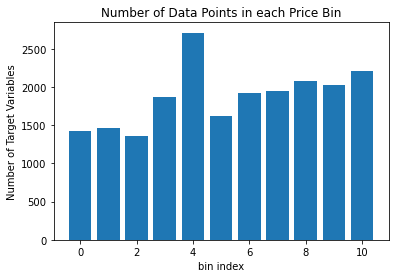

In [30]:
prices = np.array(df['price'].copy())

bins_edges_large = [8000000, 1000000, 800000, 700000, 600000, 500000, 450000, 400000, 350000, 300000, 250000, 0]

price_bin_index = [] #initialize the bin index
for price in prices:
    for i, bin_edge in enumerate(bins_edges_large[1:]):
        if (price >= bin_edge):
            price_bin_index.append(i)  #found the bin, and then break loop
            break

#checking if data is balanced across the bins.
counter = Counter(price_bin_index)
print('\nMin count: {}\tMax count: {}\tTotal number of bins: {}'
      .format(min(counter.values()), max(counter.values()), len(counter.values())))

_ = plt.bar(counter.keys(),counter.values())
_ = plt.xlabel('bin index')
_ = plt.ylabel('Number of Target Variables')
_ = plt.title('Number of Data Points in each Price Bin')
_ = plt.show

## 9.3  Final selection of Bins

Indeed the "improvements" to precision and accuracy are significant. In the end, I decide to go with the 11 bins configuration because the data point distribution are more balanced than that of the 15-bins configuration (and the 15-bins configuration has the highest accuracy and precision scores largely because of data imbalance).

#### Chosen Bins Edges - 8000000, 1500000, 1100000, 900000, 700000, 550000, 450000, 350000, 250000, 0

In [36]:
print(df.head())
df.resample('M', on='date').price.count()

          id       date     price  bedrooms  bathrooms  floors  waterfront  \
0  7787980.0 2014-10-13  221900.0       3.0       1.00     1.0         0.0   
1  6774848.0 2014-12-09  538000.0       3.0       2.25     2.0         0.0   
2  6999329.0 2015-02-25  180000.0       2.0       1.00     1.0         0.0   
3  7773052.0 2014-12-09  604000.0       4.0       3.00     1.0         0.0   
4  7760818.0 2015-02-18  510000.0       3.0       2.00     1.0         0.0   

   view  condition  review_score  basement_size   built  renovation  zipcode  \
0   0.0       fair          10.0            0.0  1955.0         0.0  98178.0   
1   0.0       fair           7.0          400.0  1951.0      1991.0  98125.0   
2   0.0       fair           8.0            0.0  1933.0         0.0  98028.0   
3   0.0  excellent           6.0          910.0  1965.0         0.0  98136.0   
4   0.0       fair           6.0            0.0  1987.0         0.0  98074.0   

   latitude  longitude  living_room_size  lot_size

date
2014-05-31    1719
2014-06-30    2129
2014-07-31    2195
2014-08-31    1898
2014-09-30    1721
2014-10-31    1858
2014-11-30    1395
2014-12-31    1416
2015-01-31     970
2015-02-28    1087
2015-03-31    1848
2015-04-30    2188
2015-05-31     657
Name: price, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


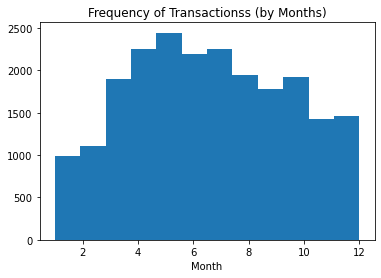

In [37]:
#plotting the monthly number of transactions
_ = plt.hist(pd.DatetimeIndex(df.date).month, bins=12)
_ = plt.xlabel('Month')
_ = plt.title('Frequency of Transactionss (by Months)')
plt.show()